In [85]:
#!/usr/bin/env python3
"""

"""

__author__ = 'Tyler Coltrain'
__version__ = 'Fall 2022'
__pylint__ = ''
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [86]:
"""
Part 1
Find a data prediction report on Kaggle.com, Towardsdatascience.com/, or another website. 
Include the link to the article. List out at least three new techniques/concepts you learned 
from this article which were not covered in this course. For each technique, describe when it shall be used, 
the advantage of using it, etc.
"""

"""
Link: https://www.kaggle.com/code/abdallhwerby/heart-failure-prediction-using-ann


One technique they used was a violin plot. Like a boxplot, it shows the median and quartile ranges.
It also shows where the majority of the data sits. However it doesnt show any outliers. The advantage of the
violin plot over the boxplot is that it shows variations in the data. So you would use it when when you want to see
the density of each variable.

A second technique they used was using variance inflation factor. It measures how independent variables are influenced
by our other independent variables. It measures the amout of multicollinearity in regression analysis. You would use it
when you want to test the effect of multiple variables on an outcome. VIF greater then 10 are strong signs of 
multicollinearity.

A third technique used was artifical neural network or ANN. ANN mimics the human brain. It takes the fed data and tries
to make predictions. You would use it when you want to map linear and non-linear relationships and interactions 
between input variables. 
"""

'\nLink: https://www.kaggle.com/code/abdallhwerby/heart-failure-prediction-using-ann\n\n\nOne technique they used was a violin plot. Like a boxplot, it shows the median and quartile ranges.\nIt also shows where the majority of the data sits. However it doesnt show any outliers. The advantage of the\nviolin plot over the boxplot is that it shows variations in the data. So you would use it when when you want to see\nthe density of each variable.\n\nA second technique they used was using variance inflation factor. It measures how independent variables are influenced\nby our other independent variables. It measures the amout of multicollinearity in regression analysis. You would use it\nwhen you want to test the effect of multiple variables on an outcome. VIF greater then 10 are strong signs of \nmulticollinearity.\n\nA third technique used was artifical neural network or ANN. ANN mimics the human brain. It takes the fed data and tries\nto make predictions. You would use it when you want t

In [87]:
"""
Part 2
List out at least three ways how this data report can be improved.

They should have done data preprocessing and cleaning before they checked for relations between some variables. 
There could have been null values that impacted their earlier graphs and assumptions.

They only cleaned three out of five columns with outliers. 

They check for multicolinearity twice with no changes, which looks like a typo. They could clean this up. They
could also clean up the model comparison they dont use.

They use log regression, random forest, and ANN to create prediction scores. They could maybe offer another 
predicion algorithm.

One thing I did like was that they explained each feature of the dataset.
"""

'\nPart 2\nList out at least three ways how this data report can be improved.\n\nThey should have done data preprocessing and cleaning before they checked for relations between some variables. \nThere could have been null values that impacted their earlier graphs and assumptions.\n\nThey only cleaned three out of five columns with outliers. \n\nThey check for multicolinearity twice with no changes, which looks like a typo. They could clean this up. They\ncould also clean up the model comparison they dont use.\n\nThey use log regression, random forest, and ANN to create prediction scores. They could maybe offer another \npredicion algorithm.\n\nOne thing I did like was that they explained each feature of the dataset.\n'

In [88]:
"""
Part 3
Build your own prediction model with the data cleaning pipeline and algorithms we have learned. 
Garbage in, garbage out. Also make sure you take all the necessary steps of data cleaning and feature 
engineering before you apply the prediction algorithm. Missing any necessary steps would be deducted 3-5 points.
"""

original_df = pd.read_csv('heart_failure_clinical_records_dataset.xls')
#checking data
original_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [89]:
#checking rows and colulmns
print(original_df.shape)
#checking balance
original_df['DEATH_EVENT'].groupby(original_df['DEATH_EVENT']).value_counts()

(299, 13)


DEATH_EVENT  DEATH_EVENT
0            0              203
1            1               96
Name: DEATH_EVENT, dtype: int64

In [90]:
#looking imbalanced

In [91]:
#checking datatypes and any null values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [92]:
#all columns seem relevant so not dropping any yet

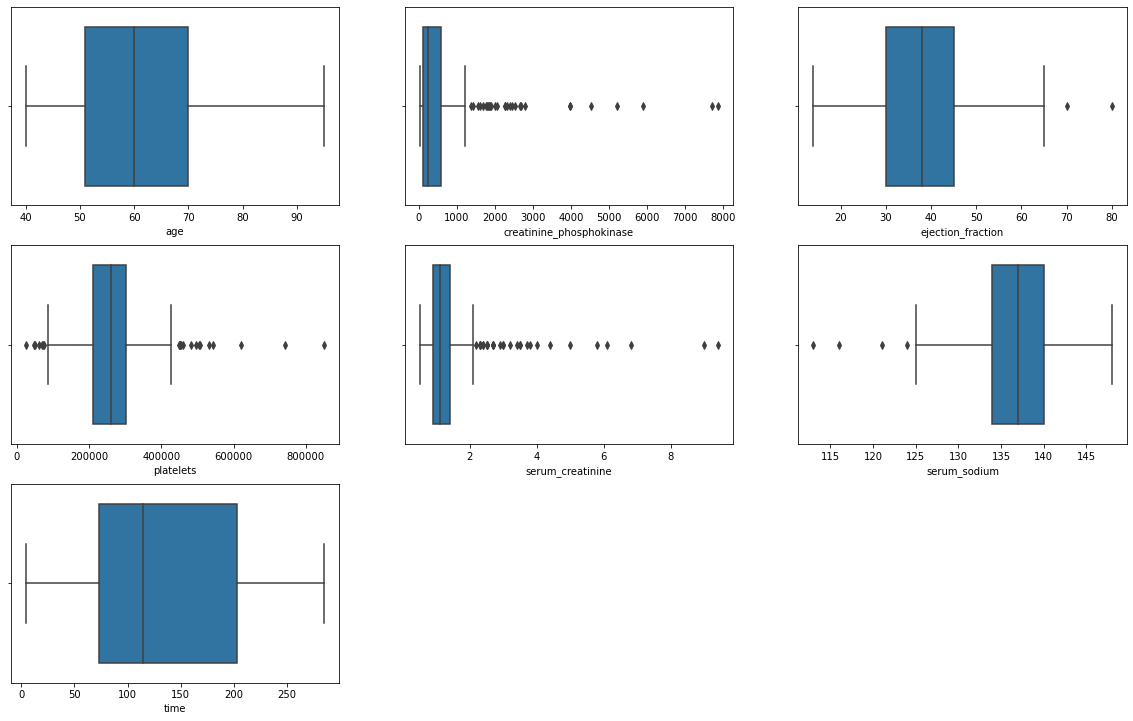

In [93]:
# checking for outliers
numeric_list = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium',
               'time']
cat_list = ['anaemia','diabetes','sex','smoking','high_blood_pressure']
full_list = original_df.columns.values.tolist()
fig = plt.figure(figsize=(20,30))
for i in range(len(numeric_list)):
    column = numeric_list[i]
    sub = fig.add_subplot(7,3, i+1)
    sns.boxplot(x=column, data=original_df)

In [94]:
original_df.loc[:,numeric_list].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [95]:
"""
identified columns with outliers.
get the whisker values and remove rows that are outside the whiskers
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
"""
clean_DF = original_df.copy()
outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for i in range(len(outliers)):
    outlier = outliers[i]
    temp = original_df[outlier].describe()
    Q1 = temp.iloc[4]
    Q3 = temp.iloc[6]
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5*IQR
    max_whisker = Q3 + 1.5*IQR
    clean_DF = original_df[original_df[outlier] > min_whisker]
    clean_DF = original_df[original_df[outlier] < max_whisker]
    
clean_DF.loc[:,numeric_list].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [96]:
clean_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [97]:
#ANOVA test for numeric columns

x = clean_DF.loc[:, numeric_list]
y = clean_DF.loc[:, 'DEATH_EVENT']

fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)
print(FeaturesS.pvalues_)

[ 20.43594646   1.17325872  23.09406305   0.71888045  28.15849226
  11.76533129 114.1812644 ]
[0.00000892 0.27961125 0.00000245 0.39719415 0.00000022 0.00068891
 0.        ]


In [98]:
temp_list = {}
for i in range(len(numeric_list)):
    temp_list[numeric_list[i]] = float("{0:.4f}".format(FeaturesS.pvalues_[i]))
temp_list

{'age': 0.0,
 'creatinine_phosphokinase': 0.2796,
 'ejection_fraction': 0.0,
 'platelets': 0.3972,
 'serum_creatinine': 0.0,
 'serum_sodium': 0.0007,
 'time': 0.0}

In [99]:
#drop everything with pvalue higher then 0.05
to_drop = ['creatinine_phosphokinase','platelets']
updated_df = clean_DF.drop(to_drop, axis = 1)
updated_df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,20,1,1.9,130,1,0,4,1
1,55.0,0,0,38,0,1.1,136,1,0,6,1
2,65.0,0,0,20,0,1.3,129,1,1,7,1
3,50.0,1,0,20,0,1.9,137,1,0,7,1
4,65.0,1,1,20,0,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,1.1,143,1,1,270,0
295,55.0,0,0,38,0,1.2,139,0,0,271,0
296,45.0,0,1,60,0,0.8,138,0,0,278,0
297,45.0,0,0,38,0,1.4,140,1,1,280,0


In [100]:
#chi-squared for catagorical data
x = updated_df.loc[:, cat_list]
y = updated_df.loc[:, 'DEATH_EVENT']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

[0.74659341 0.00065681 0.00195627 0.03234683 1.22153853]
[0.38755692 0.97955374 0.96472131 0.85726857 0.26905893]


In [101]:
temp_list = {}
for i in range(len(cat_list)):
    temp_list[cat_list[i]] = float("{0:.4f}".format(catFeatures.pvalues_[i]))
temp_list

{'anaemia': 0.3876,
 'diabetes': 0.9796,
 'sex': 0.9647,
 'smoking': 0.8573,
 'high_blood_pressure': 0.2691}

In [102]:
#all categorical columns have p value higher then 0.05
to_drop = ['anaemia','diabetes','sex','smoking','high_blood_pressure']
updated_df = updated_df.drop(to_drop, axis = 1)
updated_df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1
...,...,...,...,...,...,...
294,62.0,38,1.1,143,270,0
295,55.0,38,1.2,139,271,0
296,45.0,60,0.8,138,278,0
297,45.0,38,1.4,140,280,0


In [103]:
updated_df.corr()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
age,1.000000,0.060098,0.159187,-0.045966,-0.224068,0.253729
ejection_fraction,0.060098,1.000000,-0.011302,0.175902,0.041729,-0.268603
serum_creatinine,0.159187,-0.011302,1.000000,-0.189095,-0.149315,0.294278
serum_sodium,-0.045966,0.175902,-0.189095,1.000000,0.087640,-0.195204
time,-0.224068,0.041729,-0.149315,0.087640,1.000000,-0.526964
DEATH_EVENT,0.253729,-0.268603,0.294278,-0.195204,-0.526964,1.000000


In [117]:
"""
time, serum_creatinine, and ejection_fraction had our hiest F-scores
time and ejection_fraction are the least correlated
"""
x_final = updated_df.loc[:,['time','ejection_fraction']]
y=updated_df.loc[:,'DEATH_EVENT']
nor_x=MinMaxScaler()
x_scaled=nor_x.fit_transform(x_final)

,time,ejection_fraction
0,4,20
1,6,38
2,7,20
3,7,20
4,8,20
...,...,...
294,270,38
295,271,38
296,278,60
297,280,38


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=64, stratify=y)

In [106]:
#using oversampling to deal with imbalanced data
os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_sample(x_train, y_train)
oversampled_x


array([[0.86120996, 0.24242424],
       [0.98220641, 0.36363636],
       [0.87544484, 0.62121212],
       [0.44839858, 0.36363636],
       [0.41637011, 0.39393939],
       [0.85409253, 0.31818182],
       [0.85765125, 0.39393939],
       [0.60854093, 0.39393939],
       [0.64768683, 0.24242424],
       [0.72241993, 0.16666667],
       [0.71530249, 0.6969697 ],
       [0.02135231, 0.6969697 ],
       [0.32740214, 0.39393939],
       [0.36654804, 0.31818182],
       [0.87544484, 0.24242424],
       [0.94661922, 0.36363636],
       [0.07829181, 0.46969697],
       [0.82918149, 0.6969697 ],
       [0.06761566, 0.36363636],
       [0.85765125, 0.36363636],
       [0.66903915, 0.72727273],
       [0.50533808, 0.6969697 ],
       [0.60498221, 0.6969697 ],
       [0.46619217, 0.09090909],
       [0.13879004, 0.09090909],
       [0.4341637 , 0.31818182],
       [0.66903915, 0.54545455],
       [0.01067616, 0.09090909],
       [0.64768683, 0.6969697 ],
       [0.08896797, 0.24242424],
       [0.

In [107]:
#Checking accuracy of log regression
LogRegression = LogisticRegression(penalty='none', max_iter=500)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())
test_pred = LogRegression.predict(x_test)
accuracy_score(y_test, test_pred)

0.7666666666666667

In [108]:
k_values = []
for i in range(1, 20):
    if i%2 !=0:
        k_values.append(i)
print(k_values)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [109]:
#10 fold
k_accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, oversampled_x, oversampled_y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 


df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores.sort_values(by='accuracy', ascending=False))

      k  accuracy
1   3.0  0.830587
4   9.0  0.827367
5  11.0  0.827367
8  17.0  0.827367
0   1.0  0.824432
7  15.0  0.824337
9  19.0  0.824337
2   5.0  0.821212
3   7.0  0.805871
6  13.0  0.805682


In [110]:
#at 3 neighbors we have the most accuracy

In [111]:
#our F1 scores
saved_scores = []
for i in k_values:
    model1 = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(model1, oversampled_x, oversampled_y, cv = 10, scoring = 'f1')
    saved_scores.append(cv_score.mean())
print(saved_scores)

[0.8144842775033183, 0.8278894833964191, 0.8232959895104927, 0.804607148534388, 0.8180680408982282, 0.8141355924399175, 0.789413266835239, 0.8080086261423368, 0.8105041698143511, 0.8069056849658661]


In [112]:
#f1 with 3 neighbors
model1 = KNeighborsClassifier(n_neighbors = 3)
cv_score = cross_val_score(model1, oversampled_x, oversampled_y, cv = 10, scoring = 'f1')
ten_neighbor = (cv_score.mean())
print(ten_neighbor)

0.8278894833964191


In [113]:
"""
Our accuracy with 3 neighbors: 0.830587
Our f1 score with 3 neighbors: 0.8278894833964191

Our accuracy score for predicing if someone is dead is higher but our f1 score is lower.
Their ANN went through 200 layers that built upon the previous later while we only compared 10 folds.
"""


'\nOur accuracy with 3 neighbors: 0.830587\nOur f1 score with 3 neighbors: 0.8278894833964191\n\nOur accuracy score for predicing if someone is dead is higher but our f1 score is lower.\nTheir ANN went through 200 layers that built upon the previous later while we only compared 10 folds.\n'

In [114]:
model1.fit(oversampled_x, oversampled_y)

KNeighborsClassifier(n_neighbors=3)

In [115]:
import pickle
pickle.dump(model1, open("model.pkl", "wb"))

In [116]:
pickle.dump(nor_x, open('scaler.pkl','wb'))

In [118]:
model1.predict([[0.12099644, 3.89393939]])

array([1], dtype=int64)